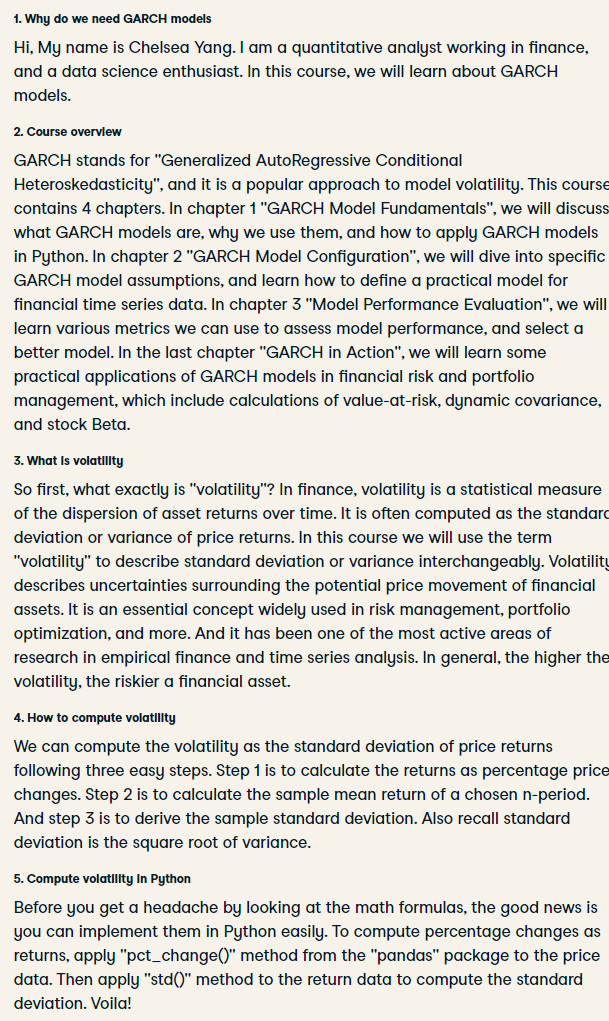

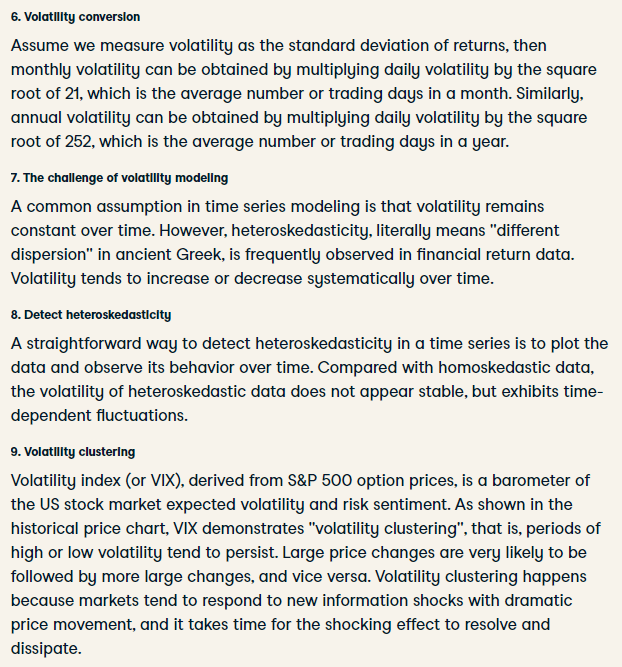

In [1]:
from IPython.display import Image
display(Image('images\\62.png'))
display(Image('images\\63.png'))

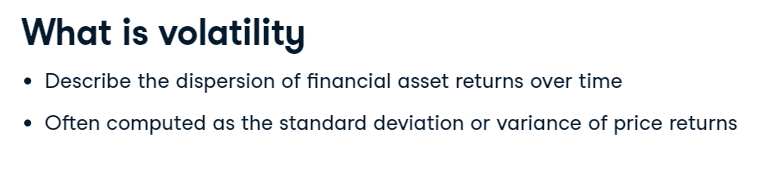

In [2]:
display(Image('images\\64.png'))

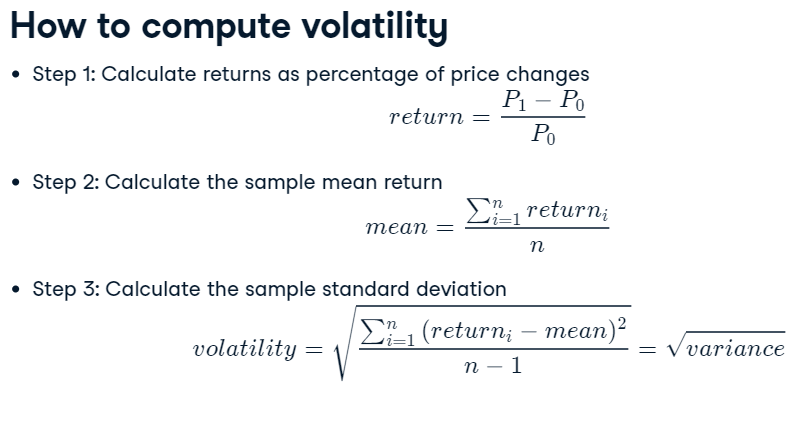

In [3]:
display(Image('images\\65.png'))

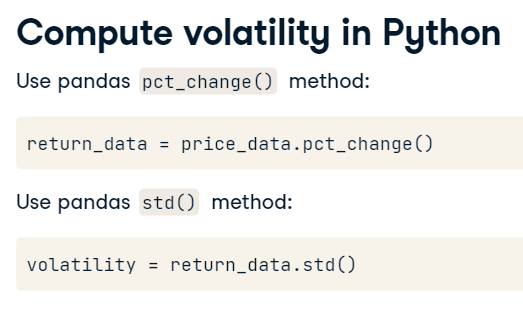

In [4]:
display(Image('images\\66.png'))

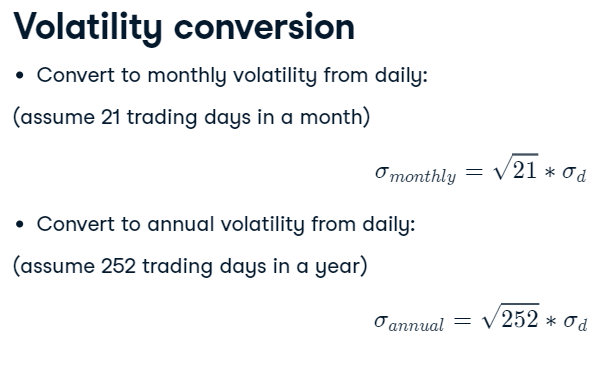

In [5]:
display(Image('images\\67.png'))

In [6]:
import pandas as pd
sp_price = pd.read_csv('time_data\\SP500.csv')

In [7]:
sp_price.drop(columns='Return', inplace=True)

In [8]:
#volatility
#calculate daily returns as percentage price changes
sp_price['Return'] = 100 * (sp_price['Close'].pct_change())

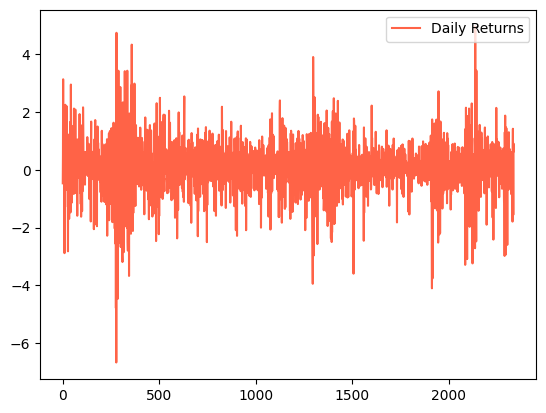

In [9]:
import matplotlib.pyplot as plt
plt.plot(sp_price['Return'], color = 'tomato', label = 'Daily Returns')
plt.legend(loc='upper right')
plt.show()

In [10]:
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

Daily volatility:  0.92%


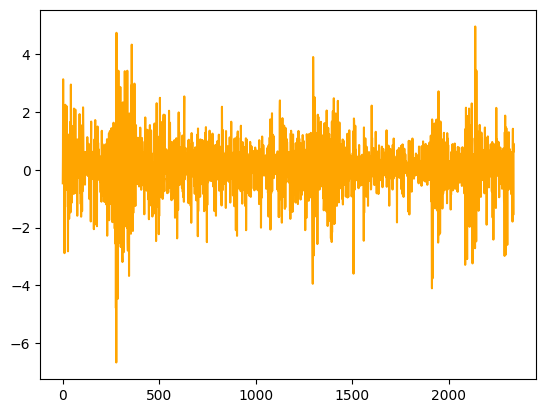

Daily volatility:  0.92%
Monthly volatility:  4.20%
Annual volatility:  14.55%


In [11]:
import math
# Plot the price returns
plt.plot(sp_price['Return'], color = 'orange')
plt.show()

# Calculate daily std of returns
std_daily = sp_price['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(std_daily))

# Convert daily volatility to monthly volatility
std_monthly = math.sqrt(21) * std_daily #month: 21일
print ('Monthly volatility: ', '{:.2f}%'.format(std_monthly))

# Convert daily volatility to annaul volatility
std_annual = math.sqrt(252) * std_daily #year: 252일
print ('Annual volatility: ', '{:.2f}%'.format(std_annual))

In [12]:
# Notice the market is indeed risky. 
# Annualized S&P 500 volatility indicates actual S&P 500 returns can fluctuate over 10% around the mean return.

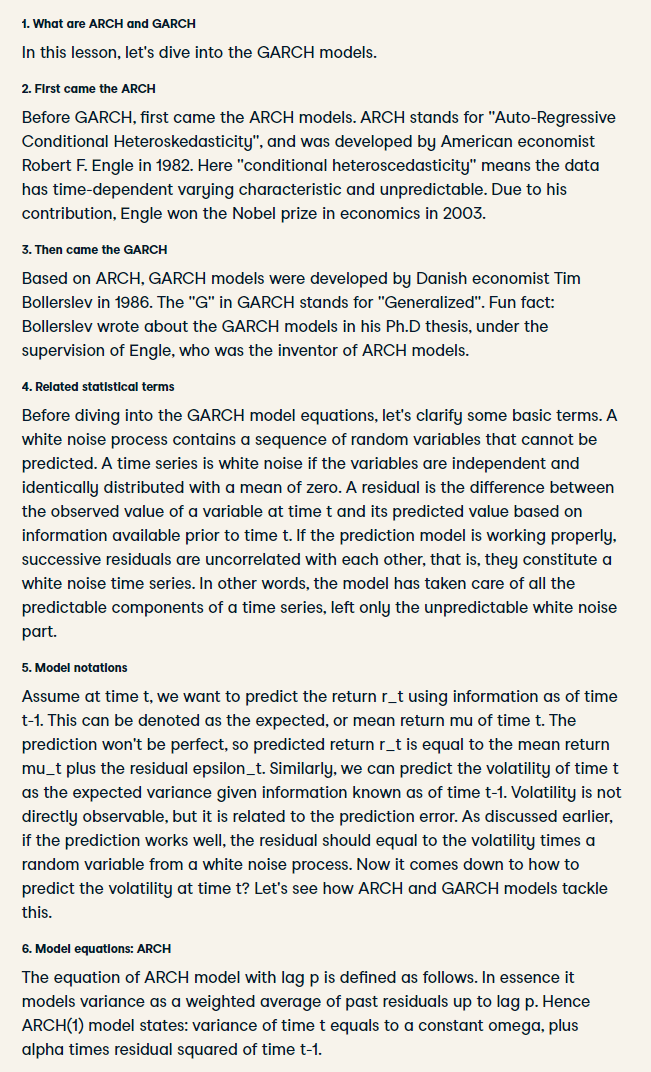

In [13]:
display(Image('images\\68.png'))

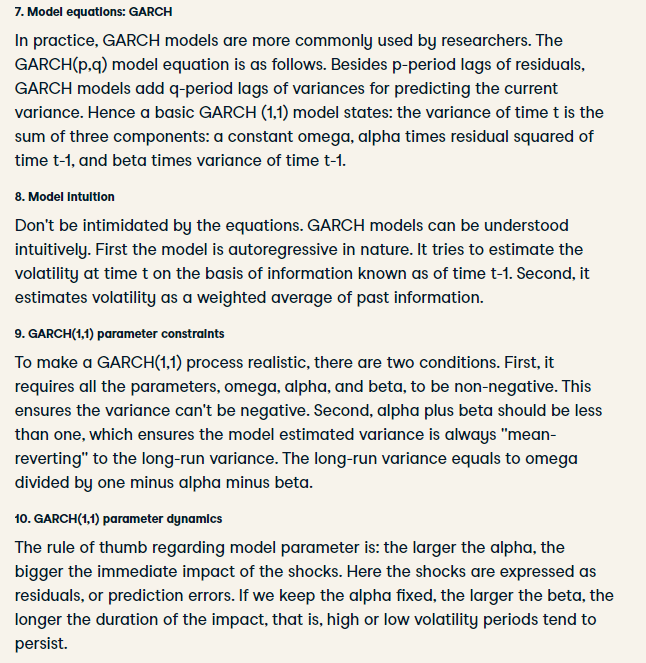

In [14]:
display(Image('images\\69.png'))

In [15]:
#White Noise의 정의에 관하여
# If the prediction model is working properly, successive residuals are uncorrelated with each other, 
# that is, they constitute a white noise time series. 
# In other words, the model has taken care of all the predictable components of a time series, 
# left only the unpredictable white noise part.

In [16]:
#ARCH/GARCH Model Intuition
# 1. model estimates volatility of t based on the known information until t-1
# 2. model estimates volatility as a weighted average of past information

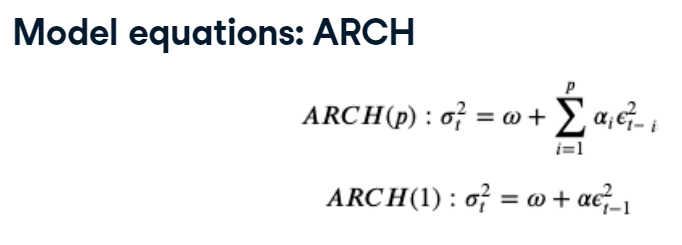

In [17]:
Image('images\\70.png')

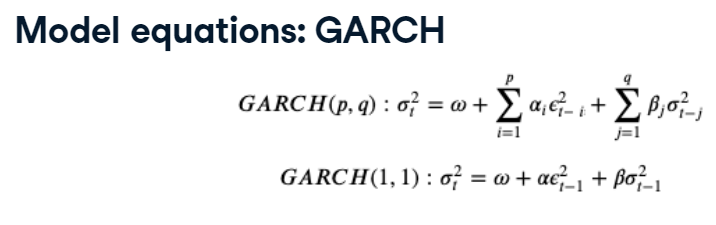

In [18]:
from IPython.display import Image
Image('images\\61.png')

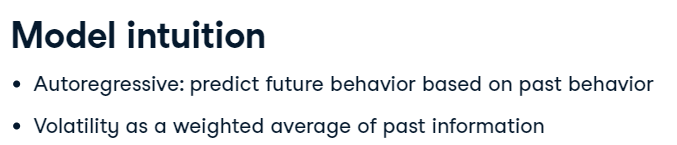

In [19]:
Image('images\\71.png')

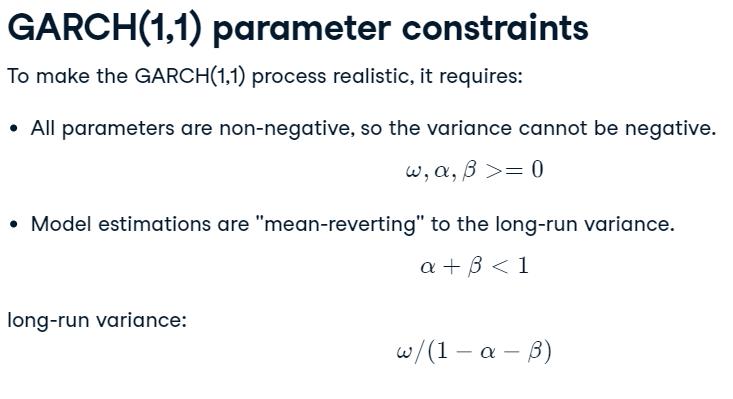

In [20]:
from IPython.display import Image
Image('images\\33.png')

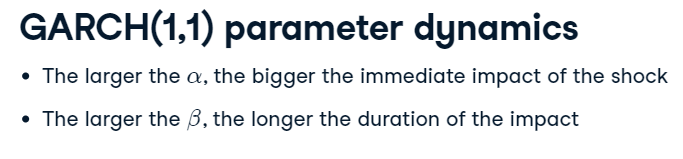

In [21]:
Image('images\\34.png')

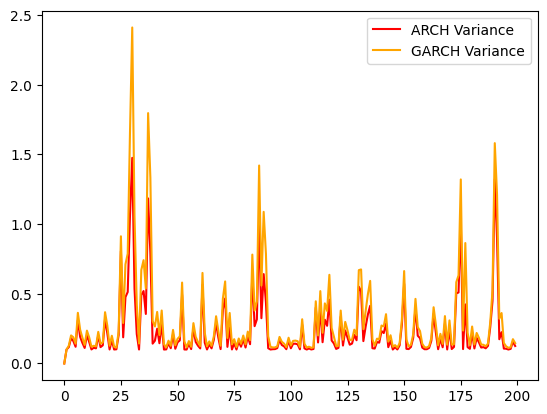

In [22]:
import numpy as np
def simulate_GARCH(n, omega, alpha, beta = 0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size = n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance

# Simulate a ARCH(1) series
arch_resid, arch_variance = simulate_GARCH(n= 200, 
                                           omega = 0.1, alpha = 0.7)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 200, 
                                             omega = 0.1, alpha = 0.7, 
                                             beta = 0.1)

# Plot the ARCH variance
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')
# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()

# As you can see, overall GARCH model generated higher volatility estimates due to the additional moving average component.

observing the impact of model parameters

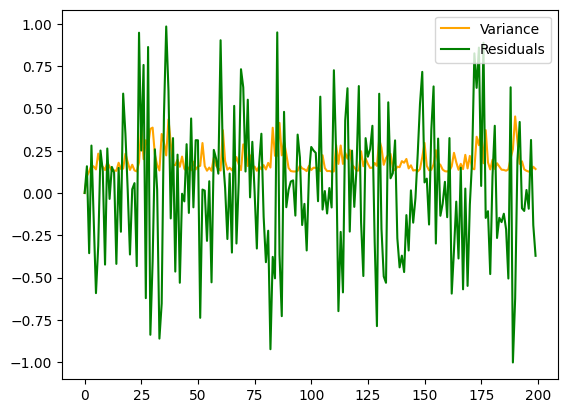

In [23]:
# First simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.2)
plt.plot(sim_variance, color = 'orange', label = 'Variance')
plt.plot(sim_resid, color = 'green', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

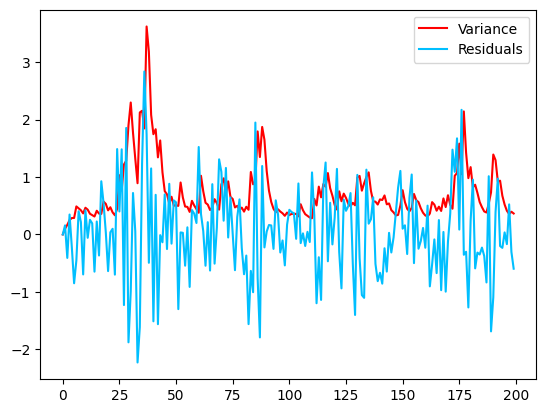

In [24]:
# Second simulated GARCH
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, 
                                          alpha = 0.3, beta = 0.6)
plt.plot(sim_variance, color = 'red', label = 'Variance')
plt.plot(sim_resid, color = 'deepskyblue', label = 'Residuals')
plt.legend(loc='upper right')
plt.show()

In [25]:
# Notice the second simulated GARCH time series has bigger variances in general. 
# The shock that occurred earlier had persistent impact on later data points.

how to implement GARCH models in python using 'arch' package

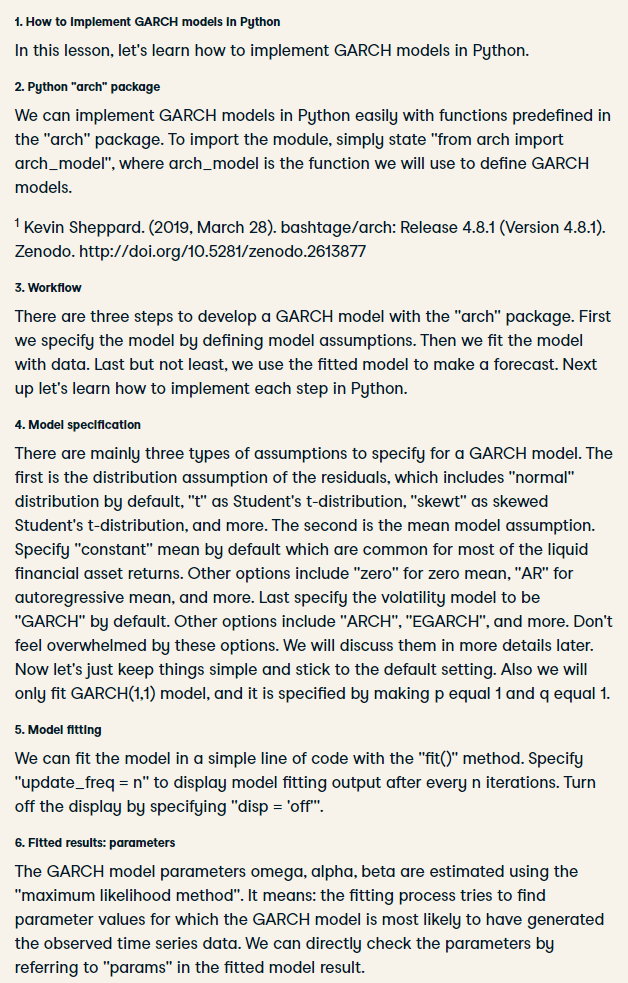

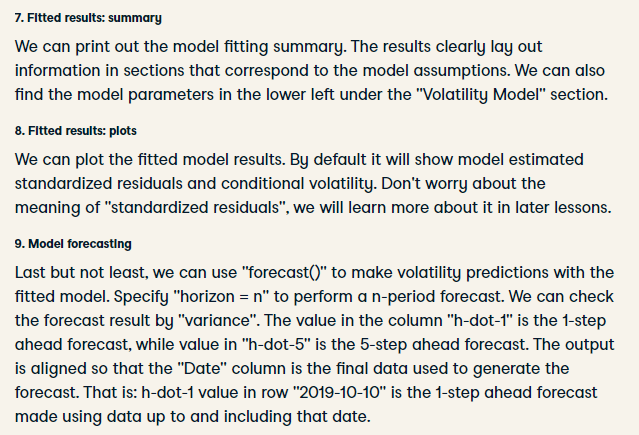

In [26]:
display(Image('images\\72.png'))
display(Image('images\\73.png'))

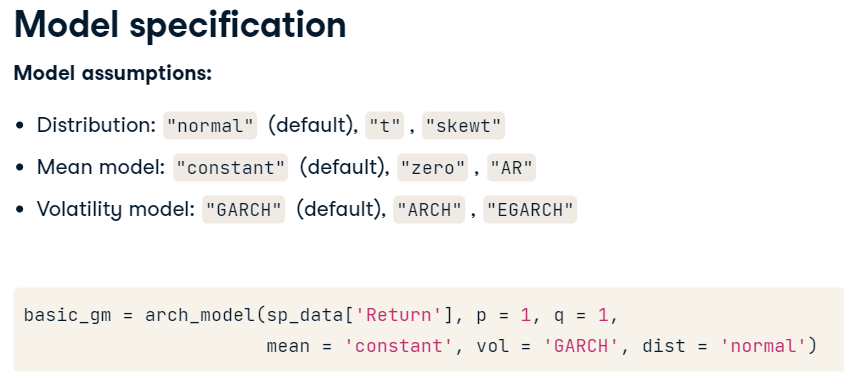

In [27]:
display(Image('images\\74.png'))

In [28]:
from arch import arch_model

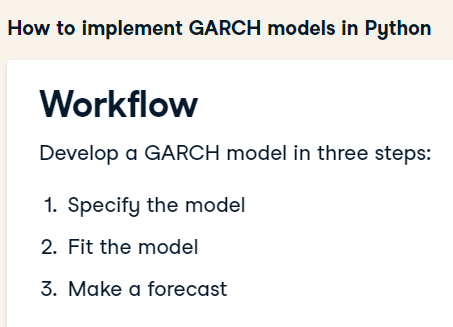

In [29]:
Image('images\\35.png')

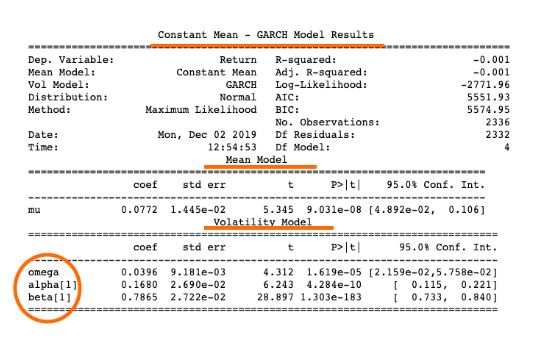

In [30]:
Image('images\\75.png')

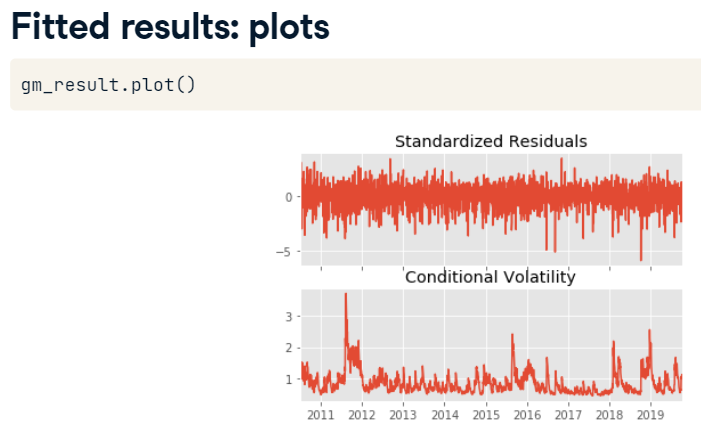

In [31]:
Image('images\\76.png')

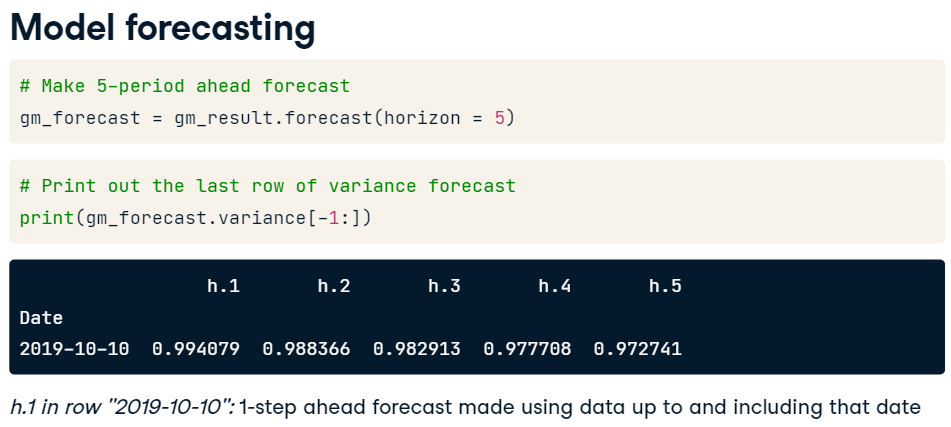

In [32]:
Image('images\\77.png')

In [33]:
sp_data = pd.read_csv('time_data\\sp500.csv', index_col='Date', parse_dates=['Date'])

In [34]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal') #default parameters
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                W

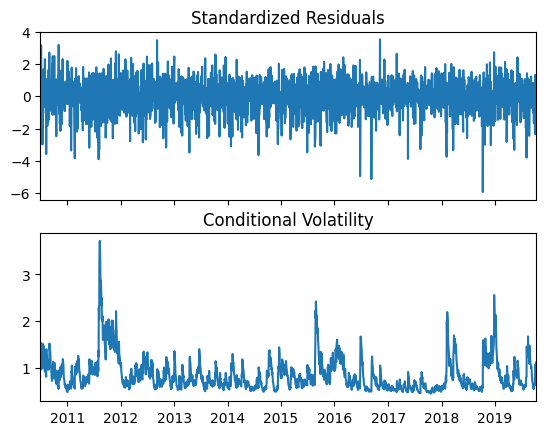

In [35]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

# Display model fitting summary
print(gm_result.summary())

# Plot fitted results
gm_result.plot()
plt.show()

forecasting

In [36]:
# Specify a GARCH(1,1) model
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1, 
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit()

# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

# Notice in the output, the value in h.1 is a 1-step ahead forecast, 
# while values in h.2, …, h.5 are 2, …, 5-step ahead forecasts. 
# Now you have gained hands-on experience with GARCH model.
# 19년 10월 10일까지의 자료를 사용한, 그 다음(날)의 forecast (h.1부터 차례로)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

c:\Users\SH\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


distribution assumptions

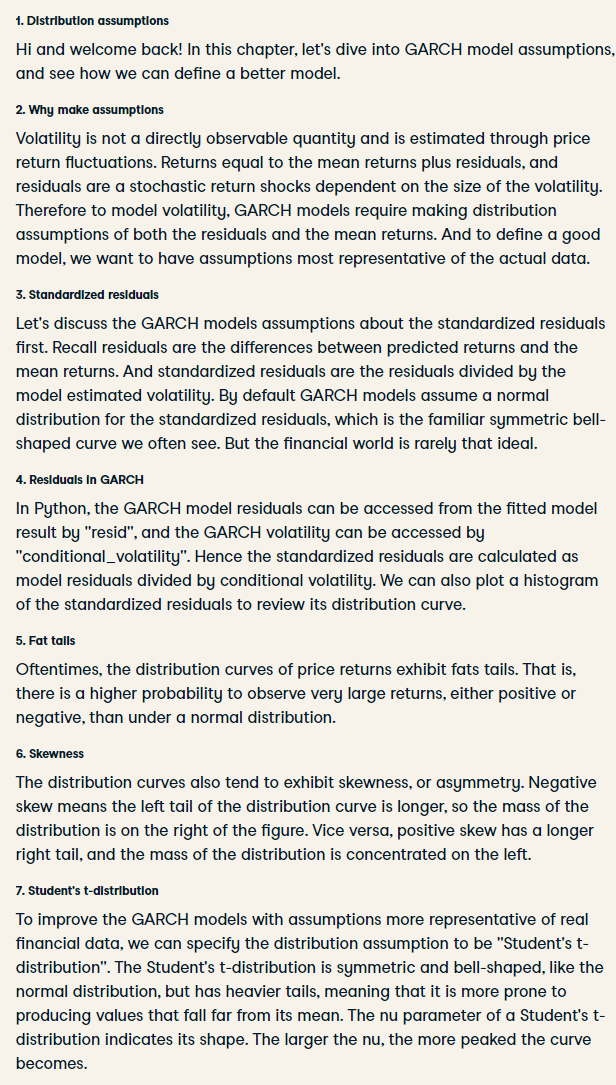

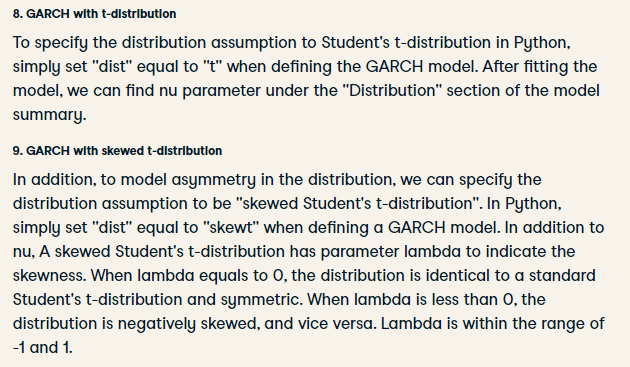

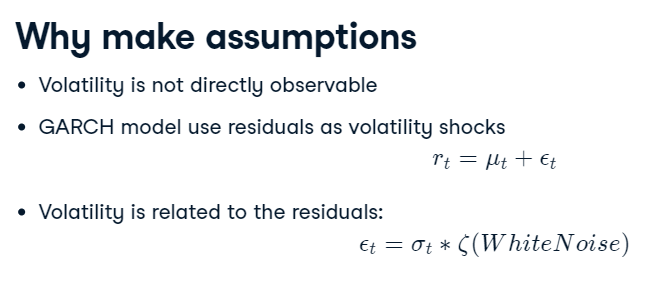

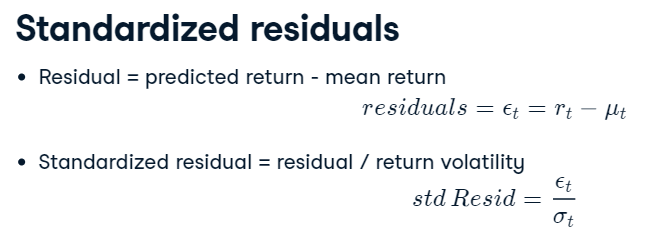

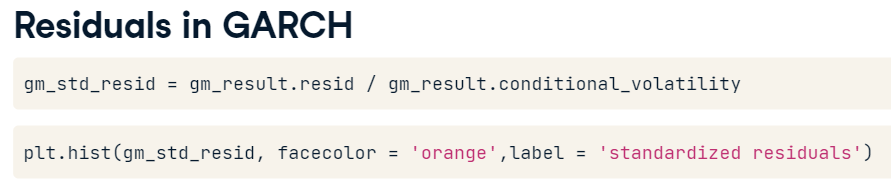

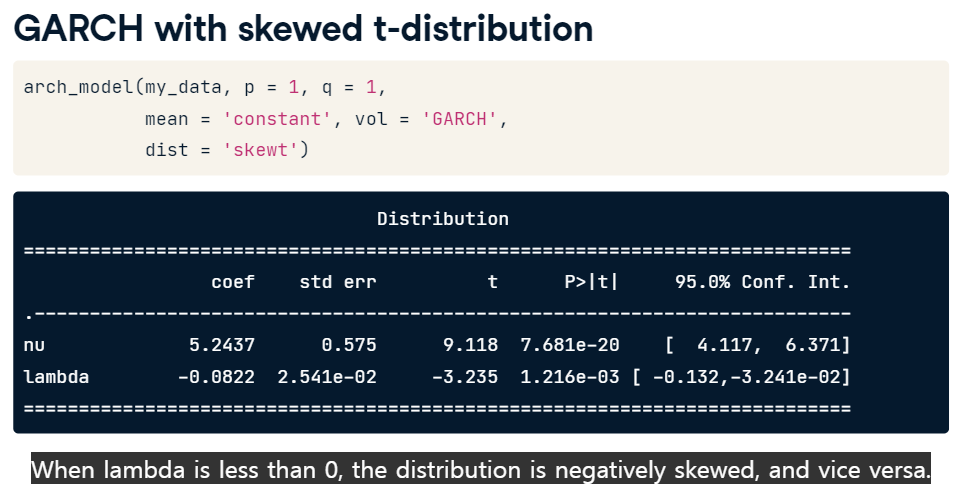

In [37]:
for i in range(78, 84):
    display(Image(f'images\\{i}.png'))

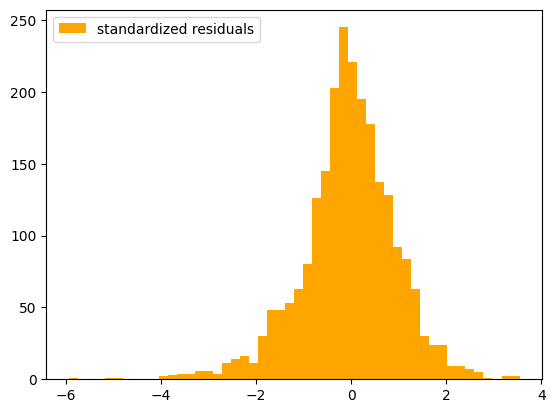

In [38]:
# Obtain model estimated residuals and volatility
gm_resid = gm_result.resid
gm_estimated_volatility = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_standardized_resid = gm_resid / gm_estimated_volatility

plt.hist(gm_standardized_resid, bins = 50, 
         facecolor = 'orange', label = 'standardized residuals')
plt.legend(loc = 'upper left')
plt.show()
# Notice that compared with a standard normal distribution, 
# the distribution curve of standardized residuals from the GARCH models exhibits more peaks, asymmetry, and has a negative skew.

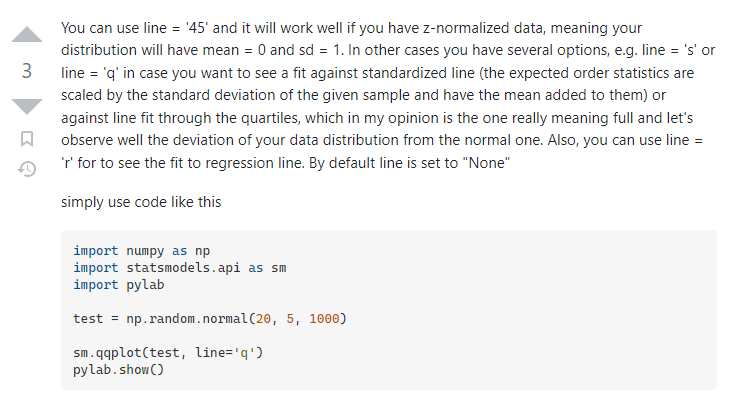

In [39]:
Image('images\\36.png')

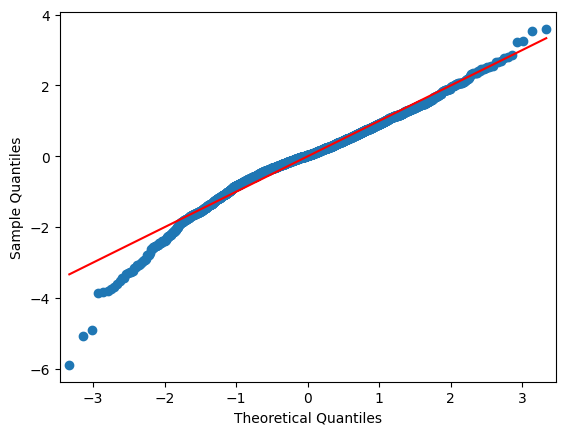

In [40]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(gm_standardized_resid, dist= stats.norm, line='s', fit=True)
plt.show()

In [41]:
# Specify GARCH model assumptions
skewt_gm = arch_model(sp_data['Return'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')
#skewt: skewed T distribution ((skewed) student's T distribution: normal에 비해 더 현실적인 가정)
# Fit the model
skewt_result = skewt_gm.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 77926.86112265919
Iteration:      2,   Func. Count:     19,   Neg. LLF: 147440.0251835162
Iteration:      3,   Func. Count:     28,   Neg. LLF: 53482.232549969376
Iteration:      4,   Func. Count:     36,   Neg. LLF: 5832.5998015417335
Iteration:      5,   Func. Count:     46,   Neg. LLF: 93659.75814882081
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5423.856962822037
Iteration:      7,   Func. Count:     63,   Neg. LLF: 4658.65008552914
Iteration:      8,   Func. Count:     71,   Neg. LLF: 2690.3468398195937
Iteration:      9,   Func. Count:     78,   Neg. LLF: 2691.2805584555344
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2690.4857728893876
Iteration:     11,   Func. Count:     94,   Neg. LLF: 2689.990911767527
Iteration:     12,   Func. Count:    101,   Neg. LLF: 2689.9812755508756
Iteration:     13,   Func. Count:    108,   Neg. LLF: 2689.979806553789
Iteration:     14,   Func. Count:    115,   Neg. LLF: 2689.

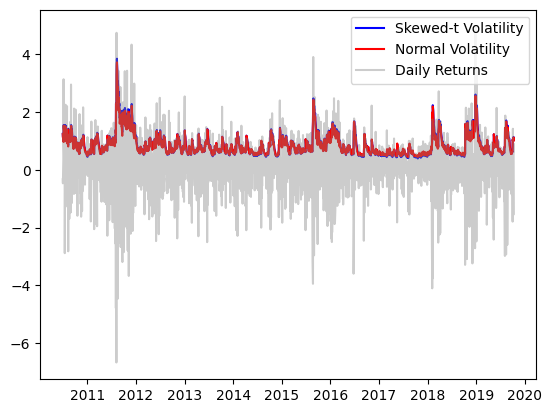

In [42]:
# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility
normal_vol = gm_result.conditional_volatility

# Plot model fitting results
plt.plot(skewt_vol, color = 'blue', label = 'Skewed-t Volatility')
plt.plot(normal_vol, color = 'red', label = 'Normal Volatility')
plt.plot(sp_data['Return'], color = 'grey', 
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

#As you can see with skewed Student’s t-distribution assumption, GARCH model estimation is more in line with the actual observations.

mean model specifications

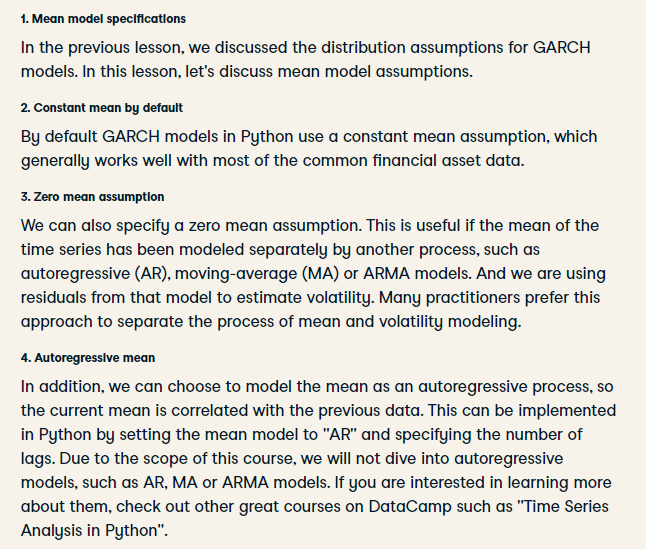

In [43]:
Image('images\\37.png')

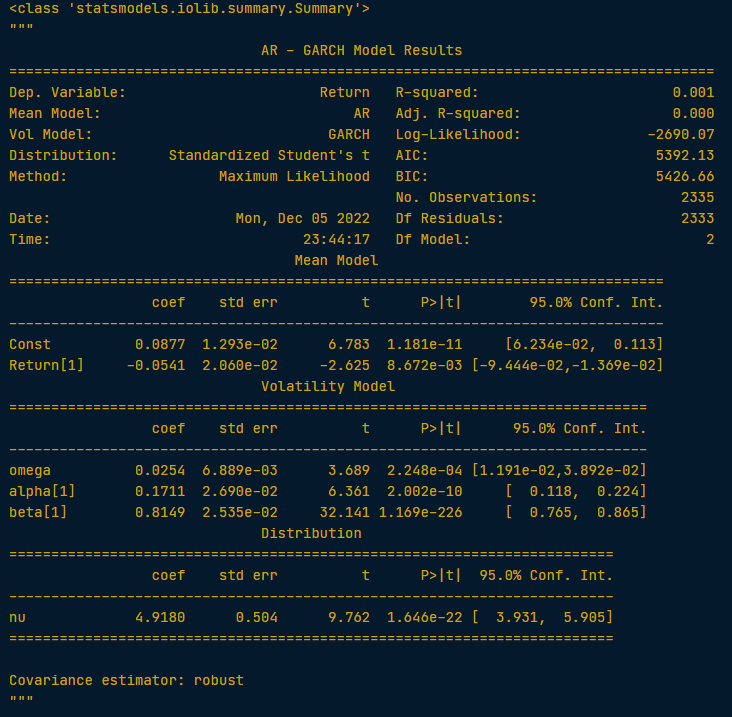

In [44]:
Image('images\\38.png')

In [45]:
# As you can see in the model fitting summary, “AR” indicates the GARCH model uses an autoregressive mean assumption. 
# And under “Mean Model” section, the Return[1] indicates a lag of 1 period is used.

In [46]:
#AR 같은 autogregressive model의 mean을 사용하고 싶다면 mean을 constant(default)가 아닌 AR로 하면 됨

In [47]:
cmean_model = arch_model(sp_data['Return'], p=1, q=1, mean='constant', vol='GARCH', dist='normal')
cmean_result = cmean_model.fit()

armean_model = arch_model(sp_data['Return'], p=1, q=1, mean='AR', lags=1, vol='GARCH', dist='normal')
armean_result = armean_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14832.611200289291
Iteration:      2,   Func. Count:     16,   Neg. LLF: 22318901155.18984
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4226.89994318323
Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.82264970074
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2782.9233125218548
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2775.3216574742
Iteration:      7,   Func. Count:     49,   Neg. LLF: 2771.988661563638
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655475955396
Iteration:      9,   Func. Count:     59,   Neg. LLF: 2771.9642779830683
Iteration:     10,   Func. Count:     64,   Neg. LLF: 2771.963838327781
Iteration:     11,   Func. Count:     69,   Neg. LLF: 2771.963828246164
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.963828246917
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.963828246164
            Iterations: 12
 

In [48]:
print(cmean_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:                Wed, Dec 07 2022   Df Residuals:                     2335
Time:                        03:50:25   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0772  1.445e-02      5.345  9.031e-08 [4.892e-0

In [49]:
print(armean_result.summary())

                           AR - GARCH Model Results                           
Dep. Variable:                 Return   R-squared:                       0.001
Mean Model:                        AR   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2767.54
Distribution:                  Normal   AIC:                           5545.08
Method:            Maximum Likelihood   BIC:                           5573.86
                                        No. Observations:                 2335
Date:                Wed, Dec 07 2022   Df Residuals:                     2333
Time:                        03:50:25   Df Model:                            2
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
------------------------------------------------------------------------------
Const          0.0815  1.496e-02      5.444  5.216e-

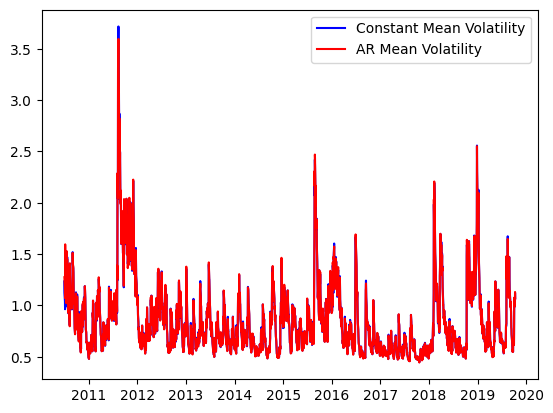

In [50]:
cmean_vol = cmean_result.conditional_volatility
armean_vol = armean_result.conditional_volatility

# Plot model volatility 
plt.plot(cmean_vol, color = 'blue', label = 'Constant Mean Volatility')
plt.plot(armean_vol, color = 'red', label = 'AR Mean Volatility')
plt.legend(loc = 'upper right')
plt.show()

In [51]:
# the plot shows volatility estimation from both models are very close. 
# In fact, the impact of the mean model assumptions on volatility estimation is so small that, 
# if the interest is only in the volatility dynamics, usually one can just assume the most simple specification, 
# namely the constant mean model.

asymmetrics shocks

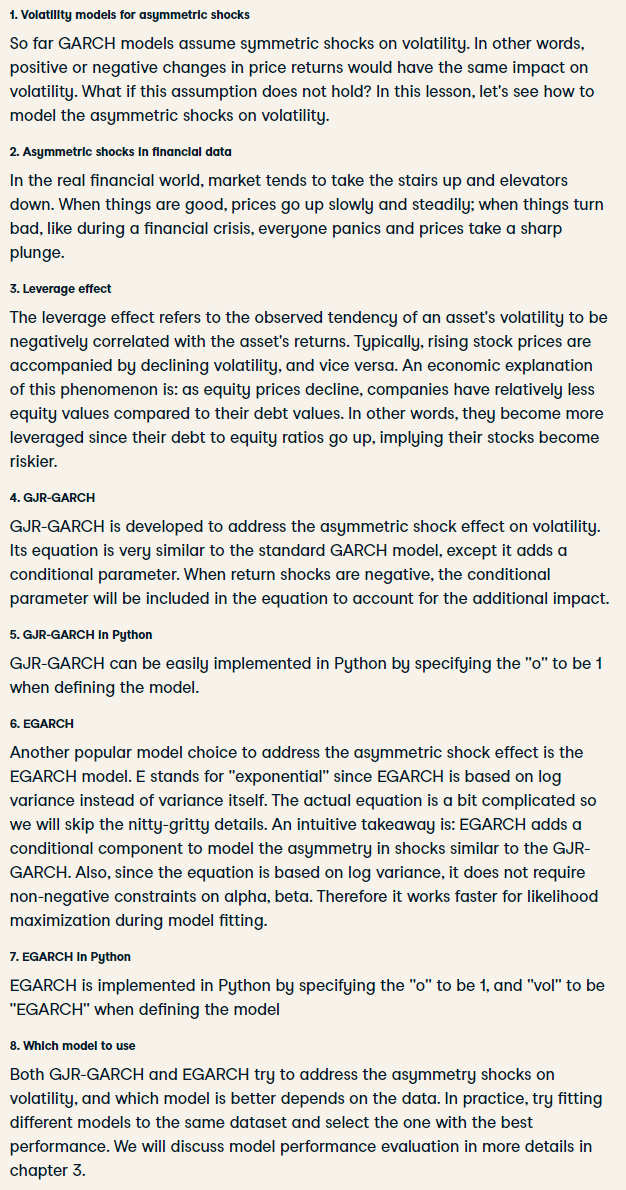

In [52]:
Image('images\\39.png')

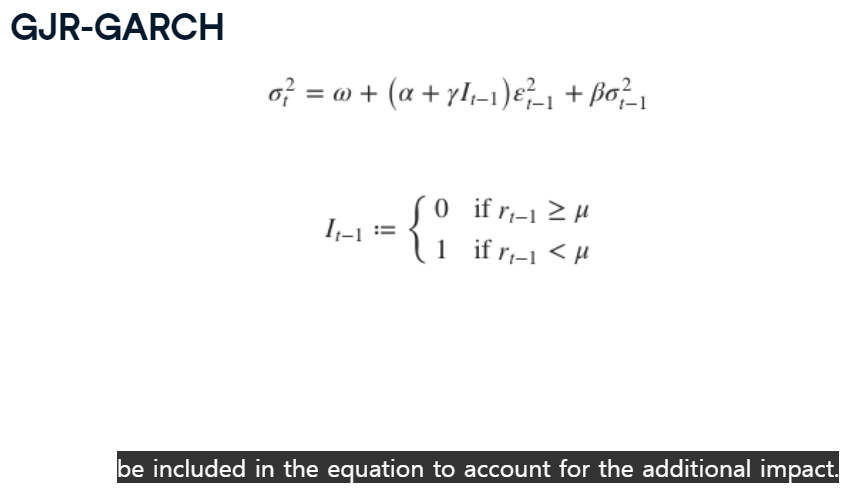

In [53]:
Image('images\\85.png')

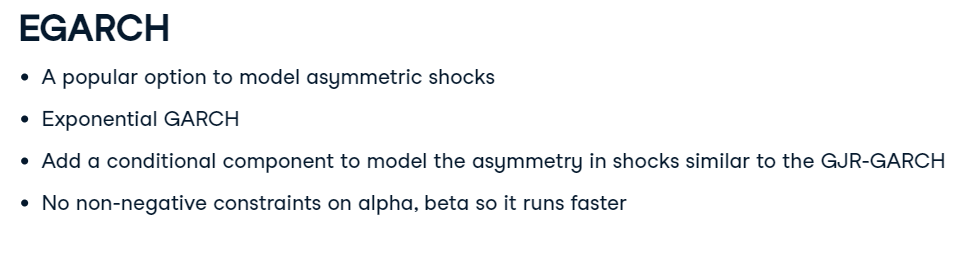

In [54]:
Image('images\\86.png')

In [55]:
bitcoin_data = pd.read_csv('time_data\\bitcoin.csv', index_col='Date', parse_dates=['Date'])

In [56]:
gjr_gm = arch_model(bitcoin_data['Return'], p=1, q=1, o=1, vol='garch', dist='t')
gjrgm_result = gjr_gm.fit(disp='off') #turn off display
print(gjrgm_result.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -3966.26
Distribution:      Standardized Student's t   AIC:                           7944.52
Method:                  Maximum Likelihood   BIC:                           7976.33
                                              No. Observations:                 1483
Date:                      Wed, Dec 07 2022   Df Residuals:                     1482
Time:                              03:50:25   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [57]:
egarch_gm = arch_model(bitcoin_data.Return, p=1, q=1, o=1, vol='EGARCH', dist='t')
egarch_result = egarch_gm.fit(disp='off')
print(egarch_result.summary())

                        Constant Mean - EGARCH Model Results                        
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                           EGARCH   Log-Likelihood:               -3954.19
Distribution:      Standardized Student's t   AIC:                           7920.38
Method:                  Maximum Likelihood   BIC:                           7952.19
                                              No. Observations:                 1483
Date:                      Wed, Dec 07 2022   Df Residuals:                     1482
Time:                              03:50:25   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [58]:
#Next up we will compare the model estimated volatility between GJR-GARCH and EGARCH.

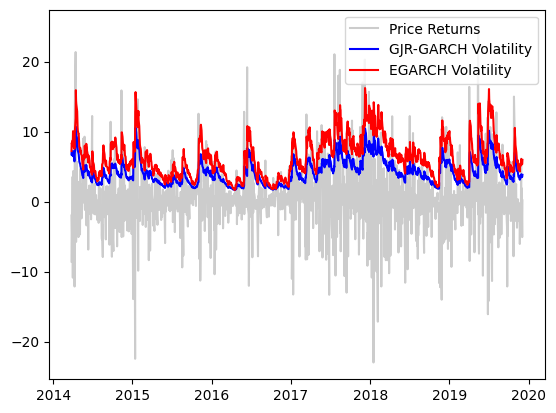

In [59]:
#plot the actual bitcoin returns
plt.plot(bitcoin_data['Return'], color='grey', alpha=0.4, label='Price Returns')

#plot GJR-GARCH estimated volatility
plt.plot(gjrgm_result.conditional_volatility, color='blue', label='GJR-GARCH Volatility')

#plot EGARCH estimated volatility
plt.plot(egarch_result.conditional_volatility, color='red', label='EGARCH Volatility')
plt.legend(loc='upper right')
plt.show()

In [60]:
# Overall both GJR-GARCH and EGARCH models did a good job of fitting the actual data. 
# Comparatively, GJR-GARCH is more conservative in volatility estimation when applying it to the Bitcoin dataset.

rolling window forecast

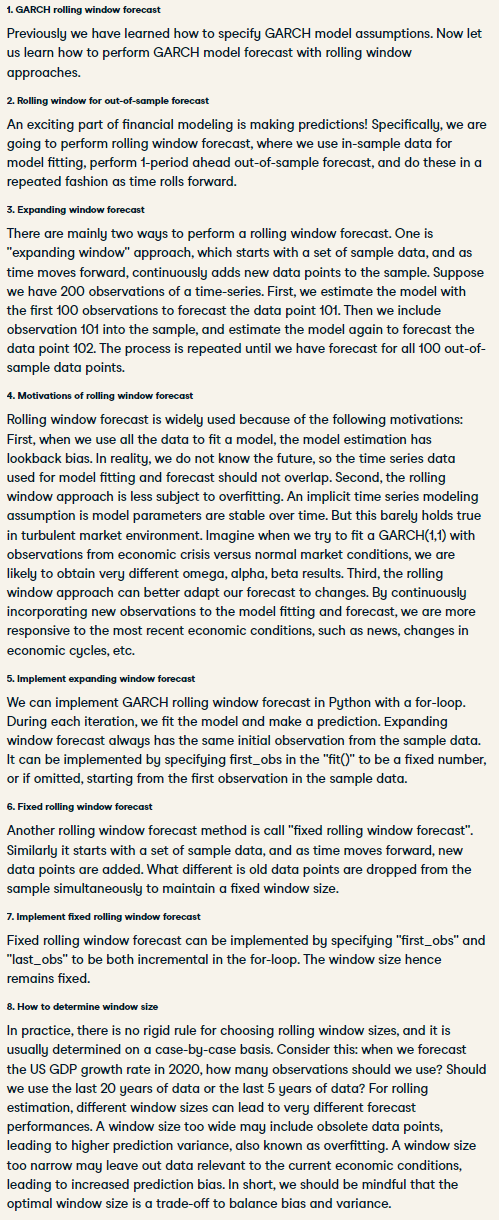

In [61]:
Image('images\\40.png')

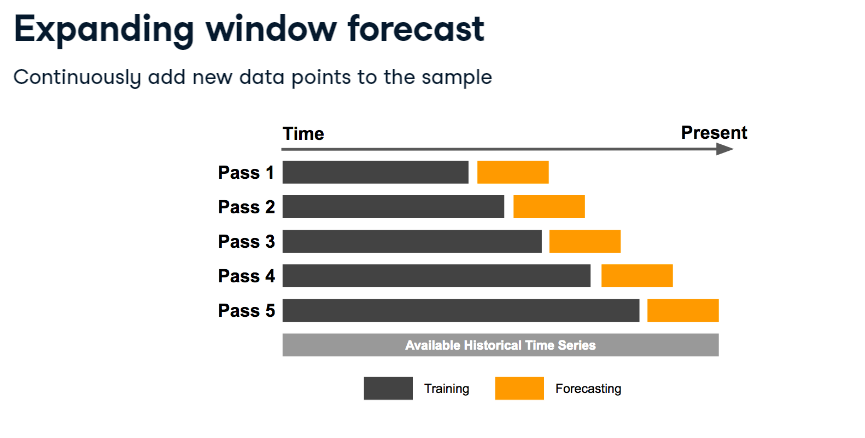

In [62]:
Image('images\\41.png')

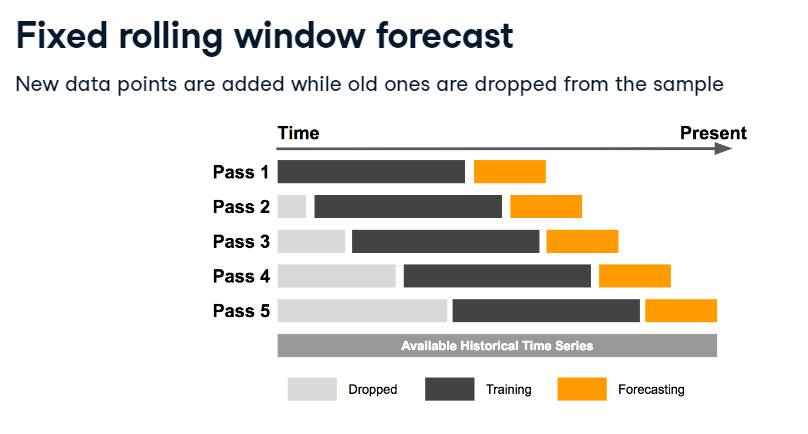

In [63]:
Image('images\\42.png')

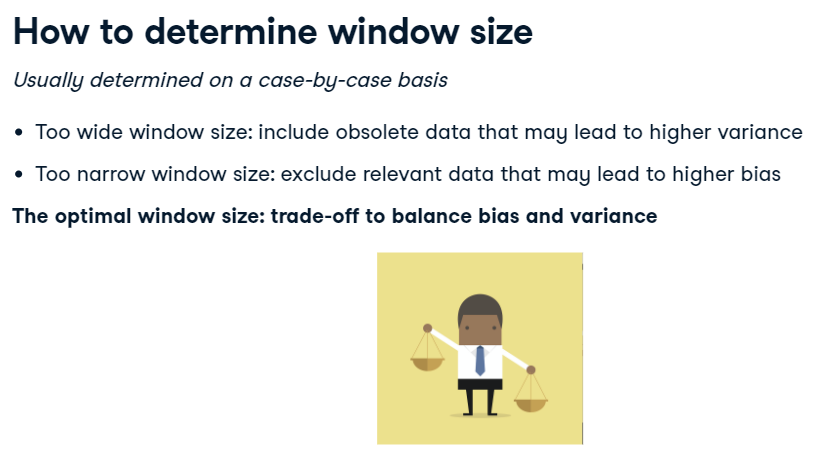

In [64]:
Image('images\\43.png')

In [65]:
# For time series analysis, it is not the bigger the sample size, the better the model performance. 
# One valid question we should always ask is: is this data relevant? Or do the same economic or market conditions still apply?

In [66]:
import warnings
warnings.filterwarnings(action='ignore')

Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.34185478042446
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.32472015398912
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 187.15480829056105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 187.13103443333628
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     34,   Neg. LLF: 186.10811377547958
Optimization terminated successfully    (Exit mode 0)
            Current function value: 186.10299133930806
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9
Iteration:      5,   Func. Count:     35,   Neg. LLF: 279.4517385207863
Iteration:     10,   Func. Count:     62,   Neg. LLF: 184.99111532555008
Optimization

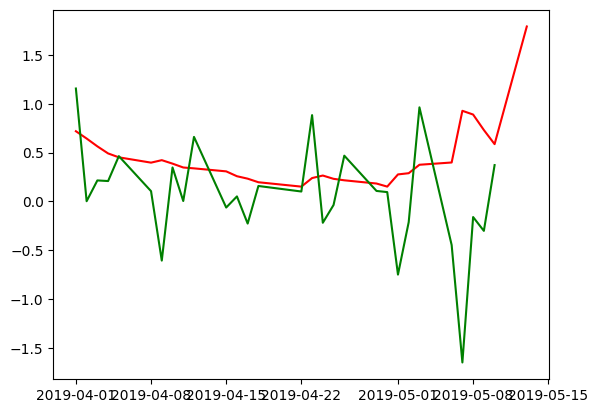

In [67]:
start_loc = 2081
end_loc = 2201
forecasts = {}

for i in range(30):
    # Specify fixed rolling window size for model fitting
    gm_result = basic_gm.fit(first_obs = i + start_loc, 
                             last_obs = i + end_loc, update_freq = 5)
    # Conduct 1-period variance forecast and save the result
    temp_result = gm_result.forecast(horizon = 1).variance
    fcast = temp_result.iloc[i + end_loc]
    forecasts[fcast.name] = fcast
# Save all forecast to a DataFrame    
forecast_var = pd.DataFrame(forecasts).T

# Plot the forecast variance
plt.plot(forecast_var, color = 'red')
plt.plot(sp_data.Return['2019-4-1':'2019-5-10'], color = 'green')
plt.show()

#FORECASTED RESULT VS. THE ACTUAL RETURNS (모델 성능 판단 지표중 하나로 쓸 수 있을 듯)

In [68]:
#As you can see the model did a decent job: variance predicted by our model fluctuates with the actual returns.

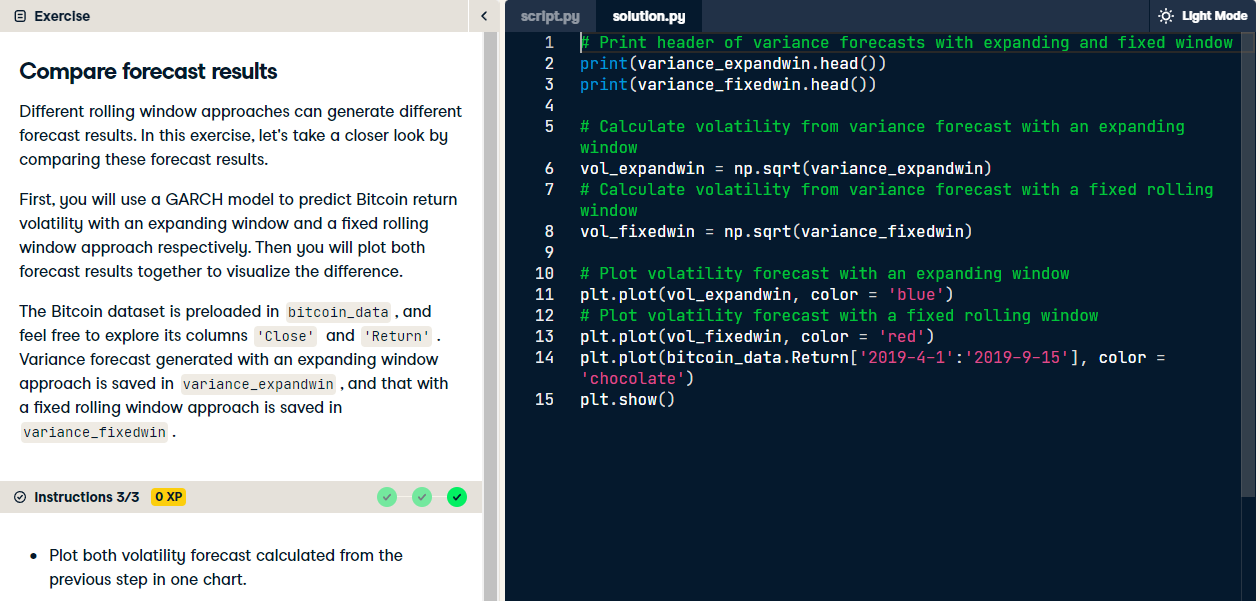

In [69]:
Image('images\\44.png')

In [70]:
# By comparison, volatility forecast with a fixed rolling window approach 
# is more responsive to recent return shocks than forecast with an expanding window approach.

significance testing of model parameters

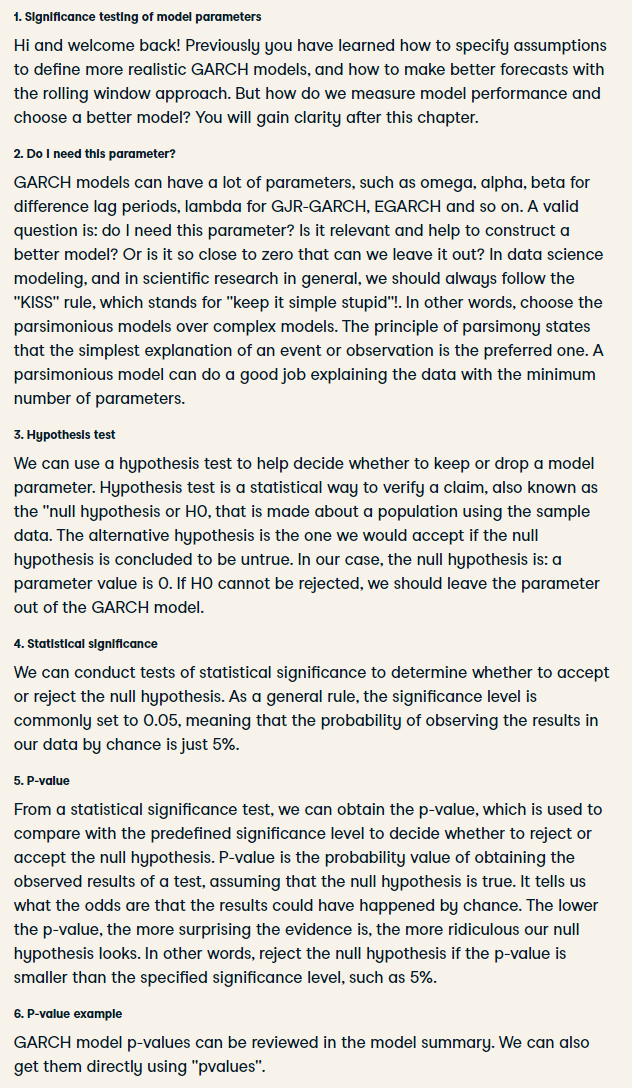

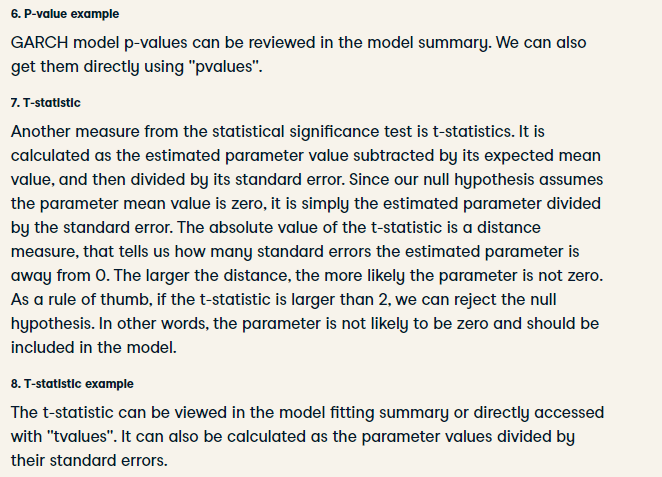

In [71]:
display(Image('images\\87.png'))
display(Image('images\\88.png'))

In [72]:
gm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -157.602
Distribution:                  Normal   AIC:                           323.204
Method:            Maximum Likelihood   BIC:                           334.353
                                        No. Observations:                  120
Date:                Wed, Dec 07 2022   Df Residuals:                      119
Time:                        03:50:26   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1103  6.665e-02      1.655  9.798e-02 [-2.034e-02,  0.241]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0349  2.587e-02      1.349      0.177 [-1.581e-02,8.561e-02]
alpha[1]       0.2070      0.142      1.453      0.146   [-7.218e-02,  0.486]
beta[1]        0.7625      0.110      6.962  3.361e-12      [  0.548,  0.977]
=============================================================================

Covariance estimator: robust
"""

In [73]:
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'p-value': gm_result.pvalues})

print(para_summary)

          parameter       p-value
mu         0.110285  9.797819e-02
omega      0.034900  1.773765e-01
alpha[1]   0.206958  1.461789e-01
beta[1]    0.762509  3.361429e-12


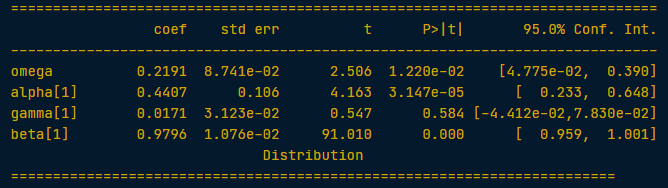

In [74]:
Image('images\\45.png')

In [75]:
# gamma's p-value is larger than 0.05, so the null hypnosis claiming the parameter value is zero cannot be rejected. 
# In this case, an asymmetric GARCH model seems to be an overkill.

# The t-statistics are in agreement with p-values, pointing out that the gamma parameter 
# is not statistically significant and should be left out of the model.

validation of GARCH model assumptions (white noise check)

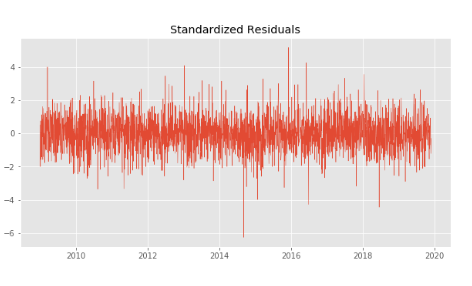

In [76]:
# example random white noise movement of standardized residual:
display(Image('images\\89.png'))

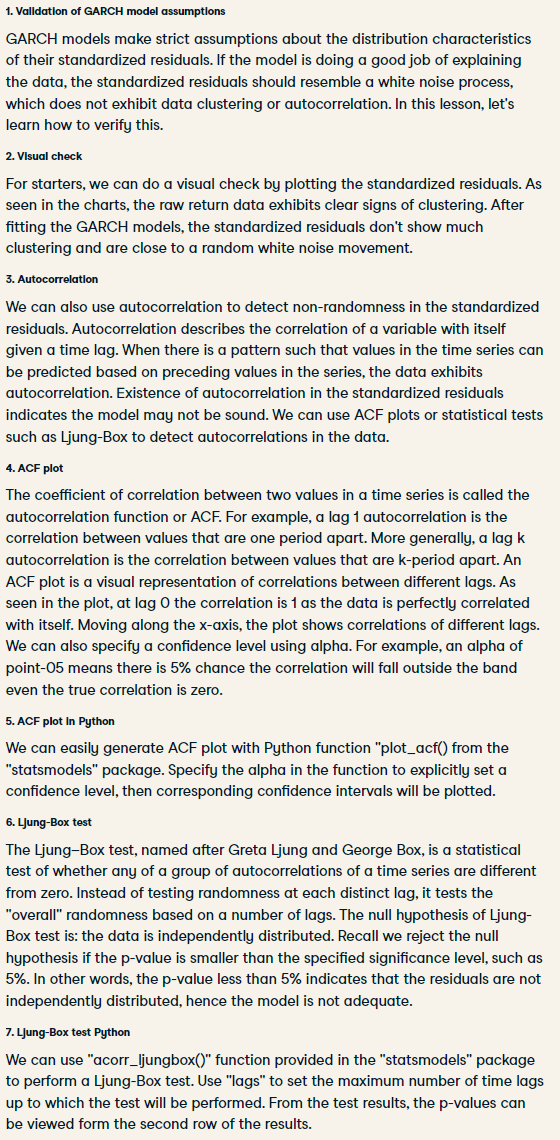

In [77]:
# Ideally the standardized residual of a GARCH model should resemble a white noise process.
# if p-value of Ljung-Box test rejected: That is rejecting the claim that the data is independently distributed (H0: iid.).
Image('images\\46.png')

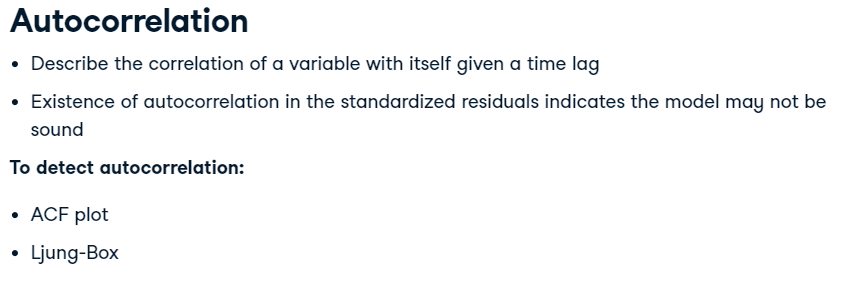

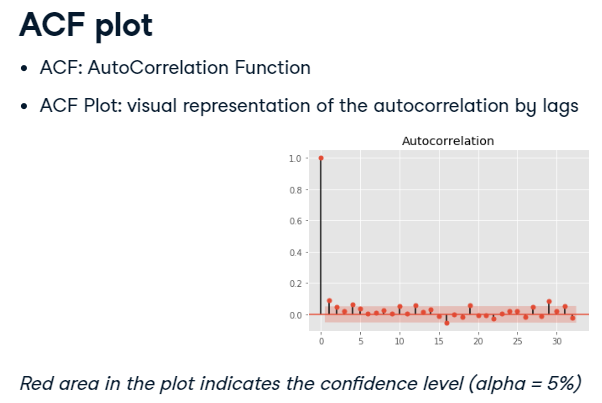

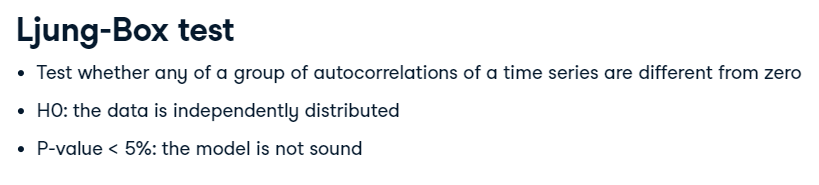

In [78]:
display(Image('images\\47.png'))
display(Image('images\\48.png'))
display(Image('images\\49.png'))

In [79]:
gm_standardized_resid

Date
2010-07-01   -0.325096
2010-07-02   -0.483222
2010-07-06    0.440525
2010-07-07    3.173076
2010-07-08    0.564521
                ...   
2019-10-04    1.338773
2019-10-07   -0.492565
2019-10-08   -1.650255
2019-10-09    0.742855
2019-10-10    0.527244
Length: 2336, dtype: float64

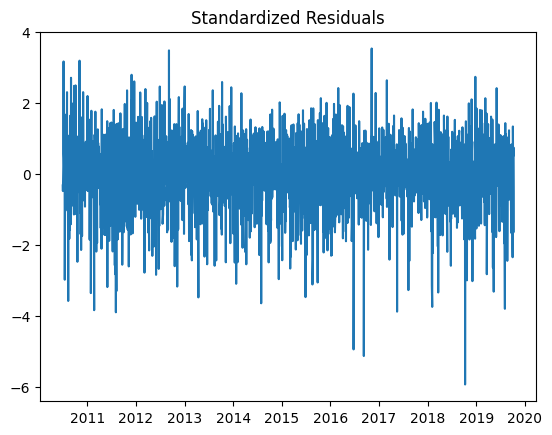

In [80]:
# Import the Python module
from statsmodels.graphics.tsaplots import plot_acf

# Plot the standardized residuals
# should be looking like white noise residuals
plt.plot(gm_standardized_resid)
plt.title('Standardized Residuals')
plt.show()

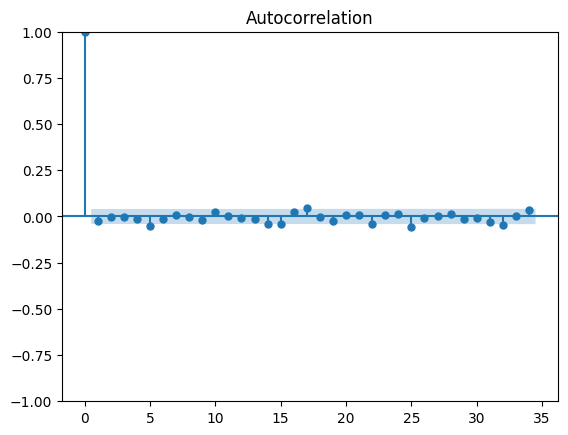

In [81]:
# Generate ACF plot of the standardized residuals
# The ACF plot shows the majority of the data points are within the confidence interval, so the model is doing a decent job.
plot_acf(gm_standardized_resid, alpha = 0.05)
plt.show()

In [82]:
# Import the Python module
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(gm_standardized_resid , lags = 10, return_df = True)

# Print the p-values
print('P-values are: ', lb_test.iloc[0,1])

#cannot reject the null hypothesis: residuals are white noise (iid)
# All the p-values are larger than 5% so the null hypothesis cannot be rejected. 
# In other words, no autocorrelations detected and the model is doing a decent job.

P-values are:  0.23421339583994125


goodness of fit

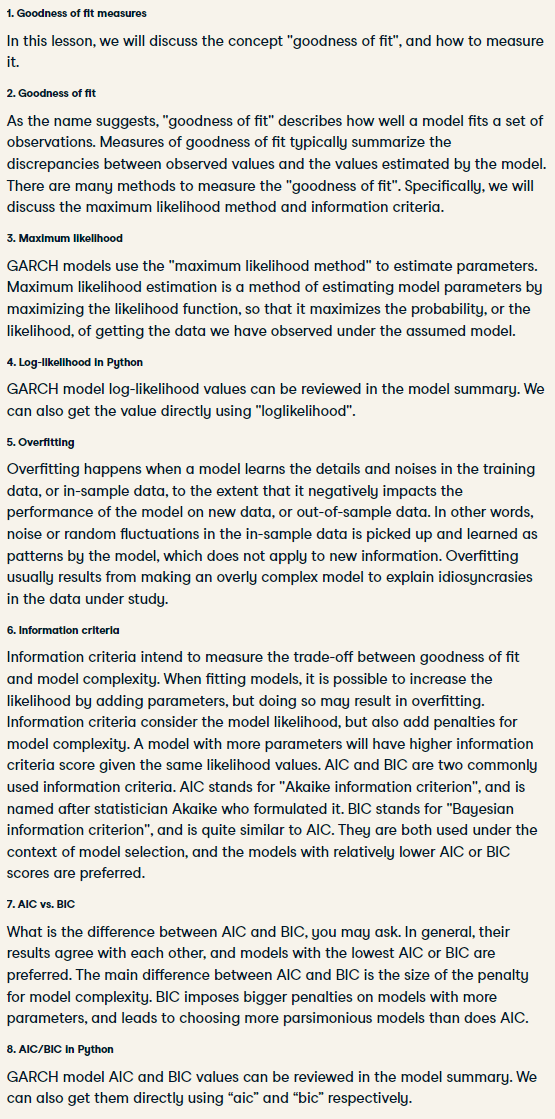

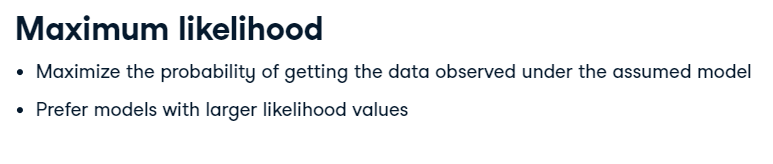

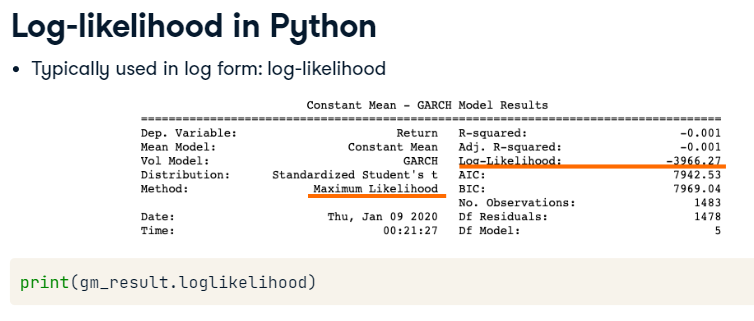

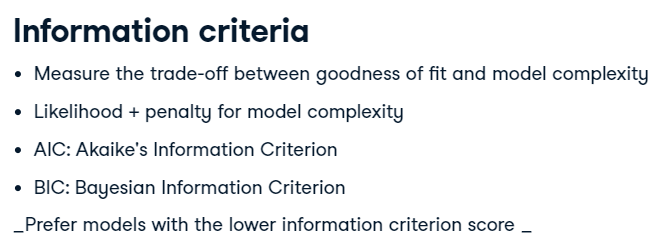

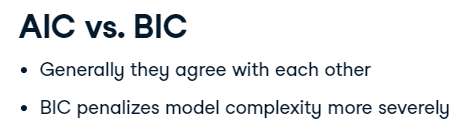

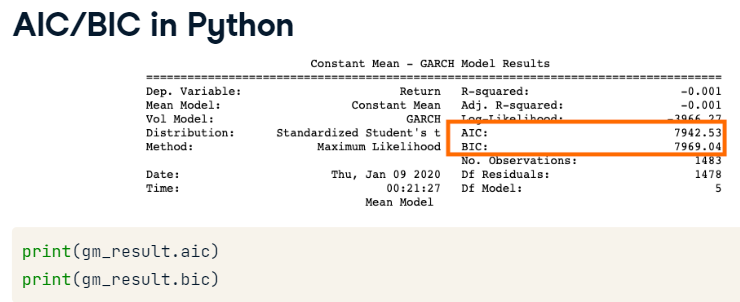

In [83]:
for i in range(50, 56):
    display(Image(f'images\\{i}.png'))

In [84]:
# AIC imposes penalties on model complexity. 
# A model with more parameters will have higher information criterion score given the same likelihood values.
#  Hence the smaller the AIC, the better the model.

In [85]:
normal_result = gm_result
# Print normal GARCH model summary
print(normal_result.summary())
# Print skewed GARCH model summary
print(skewt_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -157.602
Distribution:                  Normal   AIC:                           323.204
Method:            Maximum Likelihood   BIC:                           334.353
                                        No. Observations:                  120
Date:                Wed, Dec 07 2022   Df Residuals:                      119
Time:                        03:50:26   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1103  6.665e-02      1.655  9.798e-02 [-2.03

In [86]:
# Print the log-likelihood of normal GARCH
print('Log-likelihood of normal GARCH :', normal_result.loglikelihood)
# Print the log-likelihood of skewt GARCH
print('Log-likelihood of skewt GARCH :', skewt_result.loglikelihood)

Log-likelihood of normal GARCH : -157.60176231104964
Log-likelihood of skewt GARCH : -2689.9795443769394


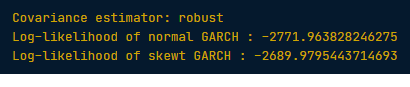

In [87]:
Image('images\\56.png')

In [88]:
# 위의 사진 예시를 보면, 
# The GARCH model with skewed Student's t-distribution assumption has a higher log-likelihood, hence is relatively better.

In [89]:
# Print the AIC GJR-GARCH
print('AIC of GJR-GARCH model :', gjrgm_result.aic)
# Print the AIC of EGARCH
print('AIC of EGARCH model :', egarch_result.aic)

# Print the BIC GJR-GARCH
print('BIC of GJR-GARCH model :', gjrgm_result.bic)
# Print the BIC of EGARCH
print('BIC of EGARCH model :', egarch_result.bic)

AIC of GJR-GARCH model : 7944.515182772752
AIC of EGARCH model : 7920.376255678416
BIC of GJR-GARCH model : 7976.326116825579
BIC of EGARCH model : 7952.187189731243


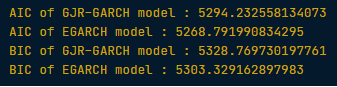

In [90]:
Image('images\\57.png')

In [91]:
# 위의 예시를 보면:
# Egarch is better
# Both AIC and BIC of the EGARCH model are lower, hence EGARCH is relatively better.

backtesting (forecasting performance)

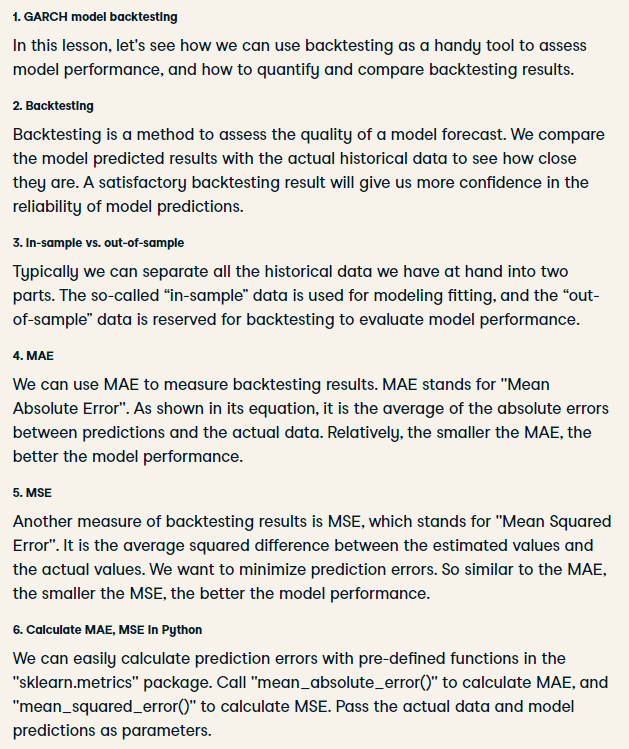

In [92]:
Image('images\\58.png')

In [93]:
# MAE and MSE are both measures of model prediction errors. 
# You want to minimize the prediction errors, so the smaller they are, the better the model performance.

In [94]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# def evaluate(observation, forecast): 
#     # Call sklearn function to calculate MAE
#     mae = mean_absolute_error(observation, forecast)
#     print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
#     # Call sklearn function to calculate MSE
#     mse = mean_squared_error(observation, forecast)
#     print('Mean Squared Error (MSE): {:.3g}'.format(mse))
#     return mae, mse

# # Backtest model with MAE, MSE
# evaluate(actual_var, forecast_var)

<AxesSubplot: xlabel='Date'>

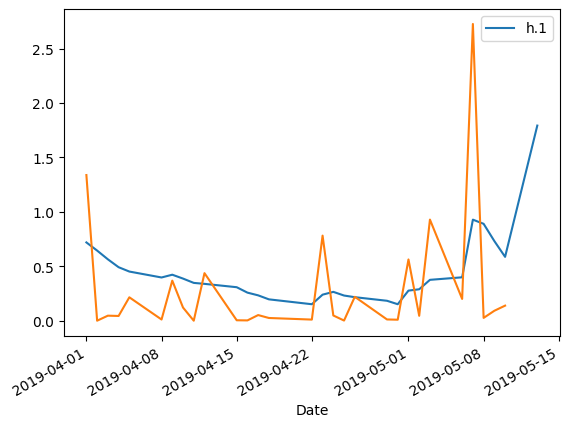

In [95]:
forecast_var.plot()
sp_data.Return['2019-4-1':'2019-5-10'].apply(lambda x: x**2).plot()

In [96]:
forecast_var.drop(index='2019-05-13', inplace=True)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(observation, forecast): 
    # Call sklearn function to calculate MAE
    mae = mean_absolute_error(observation, forecast)
    print('Mean Absolute Error (MAE): {:.3g}'.format(mae))
    # Call sklearn function to calculate MSE
    mse = mean_squared_error(observation, forecast)
    print('Mean Squared Error (MSE): {:.3g}'.format(mse))
    return mae, mse

# Backtest model with MAE, MSE


actual_var = sp_data.Return['2019-4-1':'2019-5-10'].apply(lambda x: x**2)
evaluate(actual_var, forecast_var)

Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.256


(0.3796784310085719, 0.25647481353386786)

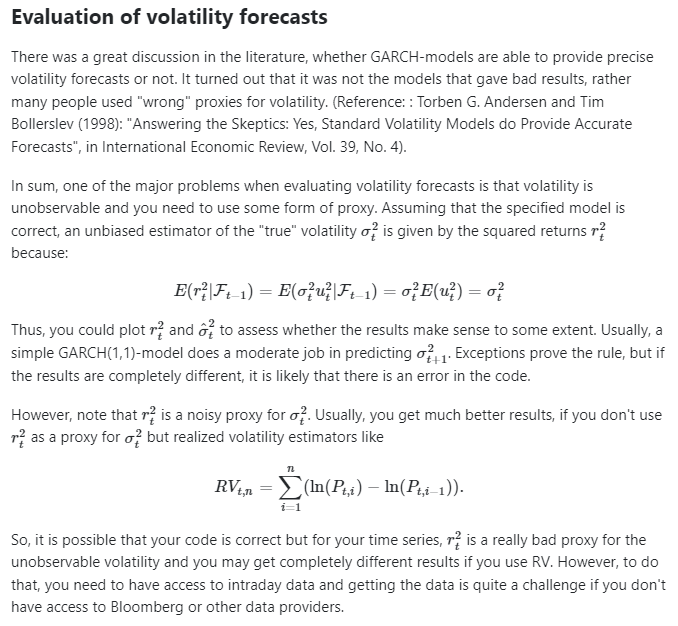

In [98]:
Image('images\\60.png')